## Tests:
here we will explore tests of various concepts used in the parellel robot optimization project interactively

### can a linear transformation change the ordering of the vertecies of a polygon? 

our first point, is that changing the order of the polygon vertecies will disturb the calculation of the area of overlap, as shown below

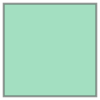

In [24]:
from shapely.geometry import Polygon
import numpy as np
p1 = Polygon(((0,0),(1,0),(1,1),(0,1)))
p1

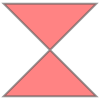

In [5]:
p2 = Polygon(((0,0),(1,1),(0,1),(1,0)))
p2

so you can see, depending on the order of the points, you can create either a convex, or self intersecting polygon, and the area's are different, and of course, the area's of overlap with another polygon would be different as well

In [10]:
print("p1 area = ", p1.area)
print("p2 area = ", p2.area)

p1 area =  1.0
p2 area =  0.0


so, we want to test using Monte-carlo methods if a polygon that has a valid point ordering can be transformed into a self intersecting polygon through a linear transformation. If it can't (which I suspect) then we never need to make a call to convex hull again, at least for 2D to 2D mapping cases

In [91]:
pts = np.array([[0,1,1,0],[0,0,1,1]])
truthArr = []
truthArr2 = []
for i in range(10):
    jac = (np.random.random((2,2)) - .5) * 2
    if np.linalg.cond(jac) < 100:
        pts_new = (jac @ pts).T
        verts = [(pts_new[i,0], pts_new[i,1]) for i in range(pts_new.shape[0])]
        poly = Polygon(verts)
        truthArr.append(poly.is_valid)
        truthArr2.append(poly.convex_hull.area - poly.area < 1e-9)

In [94]:
False in truthArr or False in truthArr2

False

this proves that we do not need to check for the convex hull of a polygon after a linear transformation, as it's points will always have a valid ordering. this can likely be proven via linear algebra first principles

### next question